In [1]:
import math
from math import sqrt
import sys
import unittest
from matplotlib import pyplot as plt
from functools import partial
from numpy import linspace

# Метод дихотомии:

In [2]:
def ternary(f, l, r, eps=2e-8):
    intervals = []
    while (r - l) / 2 >= eps:
        intervals += [[l, r]]
        m = (l + r) / 2
        l1 = m - eps / 2
        r1 = m + eps / 2

        if f(l1) > f(r1):
            l = l1
        else:
            r = r1

    return (l + r) / 2, intervals

# Метод золотого сечения:

In [3]:
def golden(f, a, b, eps=2e-8):
    fi = (1 + 5 ** 0.5) / 2
    intervals = []

    d = (b - a) / fi
    x1 = b - d
    x2 = a + d

    fx1, fx2 = f(x1), f(x2)

    while (b - a) / 2 >= eps:
        intervals += [[a, b]]
        if fx1 > fx2:
            a, b = x1, b
            x1 = x2
            x2 = a + (b - a) / fi

            fx1 = fx2
            fx2 = f(x2)
        else:
            a, b = a, x2
            x2 = x1
            x1 = b - (b - a) / fi

            fx2 = fx1
            fx1 = f(x1)

    return (a + b) / 2, intervals

# Метод фиббоначи:

In [4]:
def fibonacci(f, a, b, n):
    def fib(n):
        return 1 / sqrt(5) * (((1 + sqrt(5))/2) ** n - ((1 - sqrt(5))/2) ** n)

    f_n_2, f_n_1, f_n = fib(n - 2), fib(n - 1), fib(n)

    x1 = a + (b - a) * f_n_2 / f_n
    x2 = a + (b - a) * f_n_1 / f_n

    fx1 = f(x1)
    fx2 = f(x2)

    intervals = []
    for i in range(1, n - 2):
        intervals += [[a, b]]

        if fx1 > fx2:
            a = x1
            x1 = x2

            x2 = a + fib(n - i - 1) / fib(n - i) * (b - a)

            fx1 = fx2
            fx2 = f(x2)
        else:
            b = x2
            x2 = x1

            x1 = a + fib(n - i - 2) / fib(n - i) * (b - a)

            fx2 = fx1
            fx1 = f(x1)

    return (x1 + x2) / 2, intervals


def fibonacci_eps(f, a, b, eps=2e-8):
    fib0, fib1 = 0, 1
    n = 1
    while (b - a) / fib1 > eps:
        fib0, fib1 = fib1, fib0 + fib1
        n += 1

    # n+=10

    # print(n, eps, (b - a) / fib1)
    return fibonacci(f, a, b, n)

Дихотомия: Iterations: 27 Calls: 54 Error: 6.862675760999082e-09
Золотое сечение: Iterations: 38 Calls: 40 Error: 3.91844423575094e-09
Фиббоначи: Iterations: 38 Calls: 40 Error: 1.897324963806568e-09


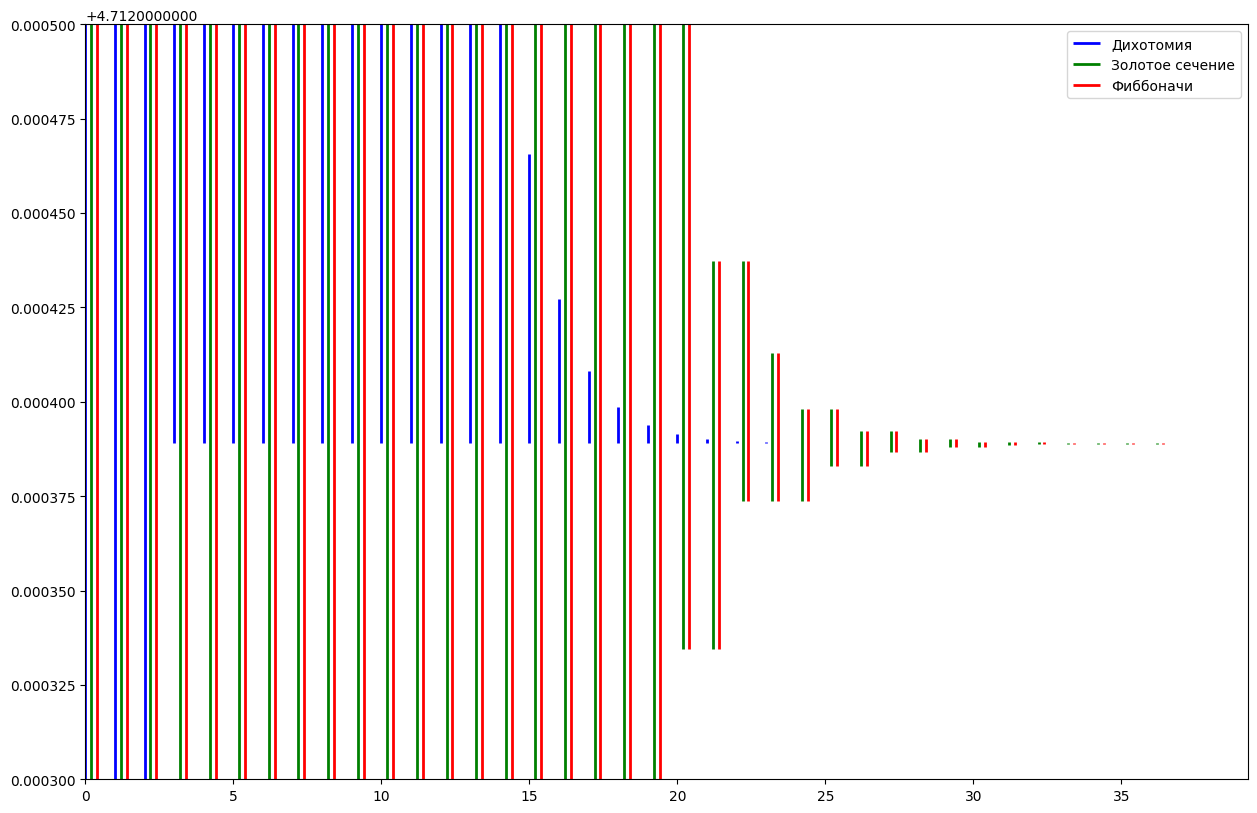

In [5]:
class TestingF:
    calls = 0

    def __init__(self, f)-> None:
        super().__init__()
        self.f = f

    def __call__(self, x, *args, **kwargs):
        self.calls += 1
        return self.f(x)

def run_and_plot(f, label, sdvig, colors, p=0):
    sin = TestingF(math.sin)
    ans, intervals = f(sin, math.pi, 1.8 * math.pi)
    ymin, ymax = list(zip(*intervals[p:]))
    plt.vlines(x=list(map(lambda x: x + sdvig, range(p, len(intervals)))), ymin=ymin, ymax=ymax, colors=colors,
               label=label, linewidth=2)
    print("{}: Iterations: {} Calls: {} Error: {}".format(label, len(intervals), sin.calls, abs(ans - 1.5 * math.pi)))

    return ans, intervals


plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 100

p=0
ans1, intervals1 = run_and_plot(ternary, label="Дихотомия", sdvig=0, colors='b', p=p)
ans2, intervals2 = run_and_plot(golden, label="Золотое сечение", sdvig=0.2, colors='g',p=p)
run_and_plot(fibonacci_eps, label="Фиббоначи", sdvig=0.4,colors='r', p=p)

plt.legend()
plt.axis(xmin=0, ymin=4.7123, ymax=4.7125)
plt.show()

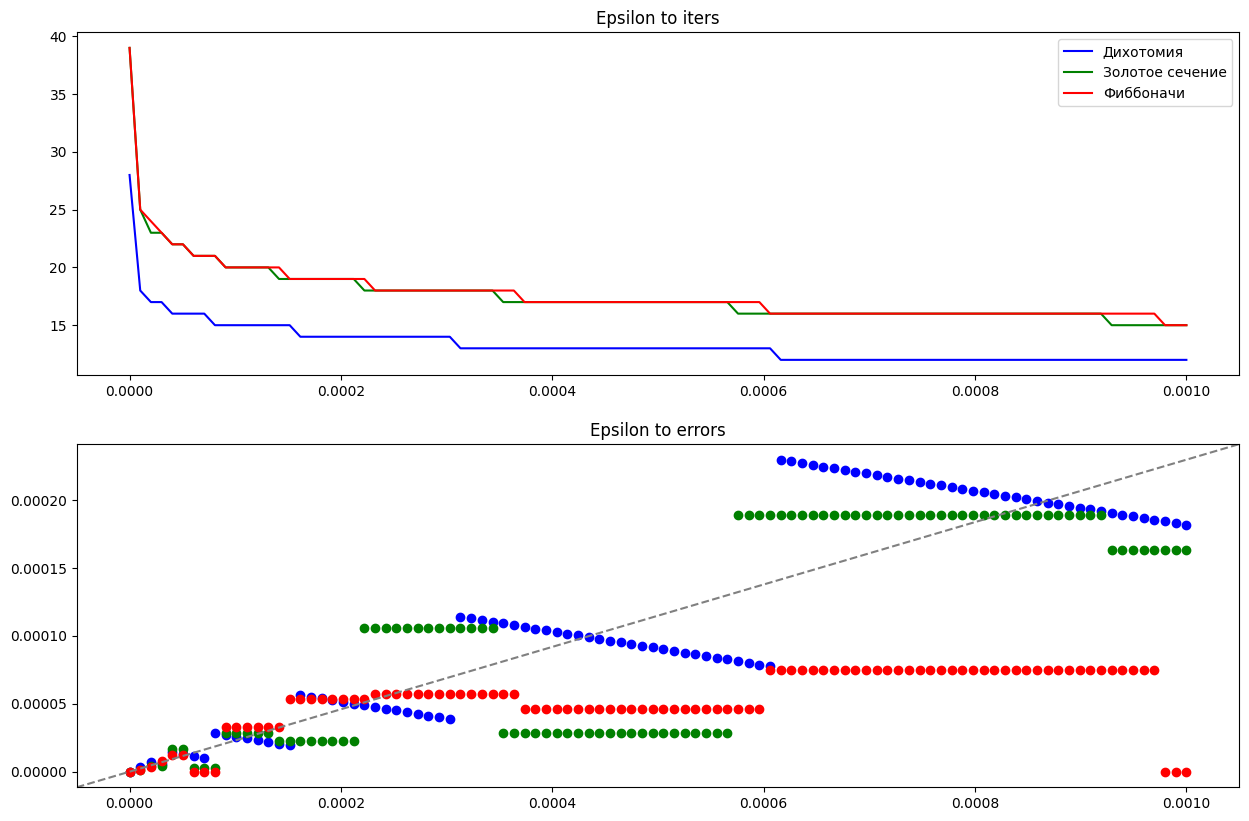

In [6]:
def eps2smthplot(fs, labels, epsRange):
    sin = TestingF(math.sin)

    fig, (ax1, ax2) = plt.subplots(2)
    ax1.set_title("Epsilon to iters")
    ax2.set_title("Epsilon to errors")
    ax2.plot([0, 1], [0, 1], transform=ax2.transAxes, ls="--", c='gray')
    colors = "bgrcmykw"

    for index, (f, label) in enumerate(zip(fs, labels)):
        iters = []
        errors = []
        for eps in epsRange:
            ans, intervals = f(sin, math.pi, 1.8 * math.pi, eps=eps)
            # print(eps)
            iters.append(len(intervals))
            errors.append(abs(ans - 1.5 * math.pi))

        ax1.plot(epsRange, iters, label=label, c=colors[index])
        ax2.scatter(epsRange, errors, label=label, c=colors[index])

    ax1.legend(loc="upper right")
    plt.show()

epsRange = linspace(1e-8, 1e-3, 100)  # [10 ** (-3)]
functions = [ternary, golden, fibonacci_eps]
labels = ["Дихотомия", "Золотое сечение", "Фиббоначи"]
eps2smthplot(functions, labels=labels, epsRange=epsRange)